## Phần khám phá dữ liệu

Tải dữ liệu từ kaggle bằng opendatasets, hoặc tải trực tiếp từ kaggle thì có thể bỏ qua cell dưới này. 

In [2]:
import opendatasets as od

od.download('https://www.kaggle.com/datasets/andrewmvd/steam-reviews')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:

KeyError: 'content-length'

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')
df.head() 

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


In [62]:
df.shape

(6417106, 5)

In [63]:
df.describe(include='all')

,app_id,app_name,review_text,review_score,review_votes
count,6.417106e+06,6233872,6409801,6.417106e+06,6.417106e+06
unique,NaN,9363,4473473,NaN,NaN
top,NaN,PAYDAY 2,Early Access Review,NaN,NaN
freq,NaN,88973,1013351,NaN,NaN
mean,2.274695e+05,NaN,NaN,6.394992e-01,1.472446e-01
std,1.260451e+05,NaN,NaN,7.687918e-01,3.543496e-01
min,1.000000e+01,NaN,NaN,-1.000000e+00,0.000000e+00
25%,2.018100e+05,NaN,NaN,1.000000e+00,0.000000e+00
50%,2.391600e+05,NaN,NaN,1.000000e+00,0.000000e+00
75%,3.056200e+05,NaN,NaN,1.000000e+00,0.000000e+00


In [64]:
df.isnull().values.any()

True

In [65]:
df.isnull().sum()

app_id               0
app_name        183234
review_text       7305
review_score         0
review_votes         0
dtype: int64

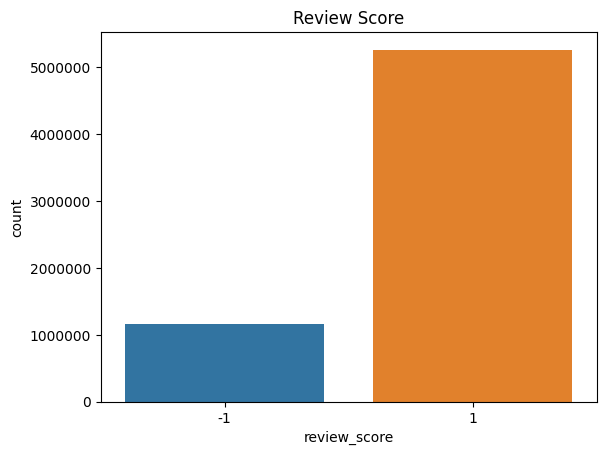

In [66]:
sns.countplot(x="review_score", data=df).set_title('Review Score')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

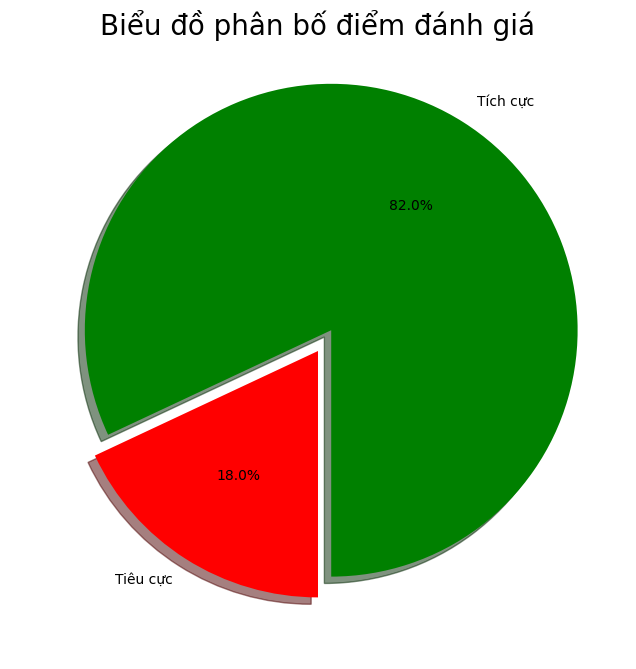

In [67]:
# Biểu đồ tròn phân bố điểm đánh giá
plt.figure(figsize=(8, 8))
labels = ['Tích cực', 'Tiêu cực']
sizes = df['review_score'].value_counts(sort=True)
colors = ['green', 'red']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Biểu đồ phân bố điểm đánh giá', fontsize=20)
plt.show()

In [68]:
reviews_text = df['review_text'].reset_index(name='text')
# Đếm tần suất xuất hiện của các từ lặp lại trong review_text
tc = reviews_text['text'].value_counts().reset_index(name='count')
tc.rename(columns={'index': 'text'}, inplace=True)
tc.head(10)

,text,count
0,Early Access Review,1013351
1,Early Access Review,11334
2,10/10,6147
3,.,4885
4,Great game,3710
5,great game,3642
6,Great game!,2493
7,:),2140
8,Nice game,1839
9,♥♥♥♥,1711


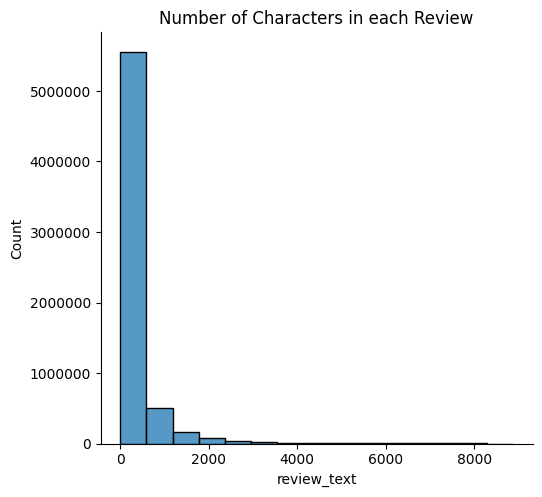

In [69]:
sns.displot(df["review_text"].str.len(), kde=False, bins=15)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Number of Characters in each Review')
plt.show()

In [70]:
round(df["review_text"].str.len().mean())

304

In [71]:
# Number of review with review_vote = 1
df[df['review_votes'] == 1].shape[0]

944884

### Word Cloud

In [72]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

def WordCloud_generator(data, title=None):
    
    # Keep top 1000 most frequent words
    most_freq = Counter(data).most_common(1000) 
    text = ' '.join([x[0] for x in most_freq])
    
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          min_font_size = 10,
                          collocations=False
                         ).generate(text)

    # plot the Word Cloud                      
    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=25)
    plt.show() 

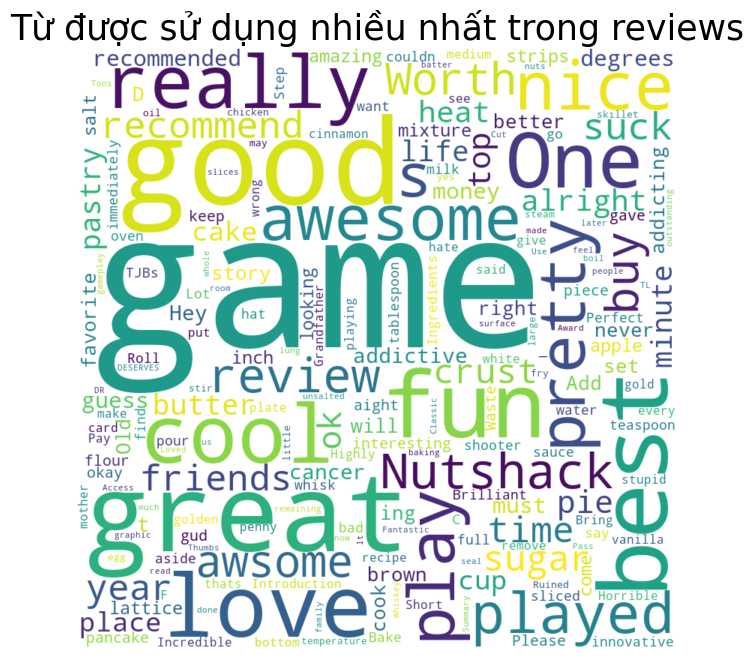

In [73]:
WordCloud_generator(df["review_text"].astype(str),
title="Từ được sử dụng nhiều nhất trong reviews")

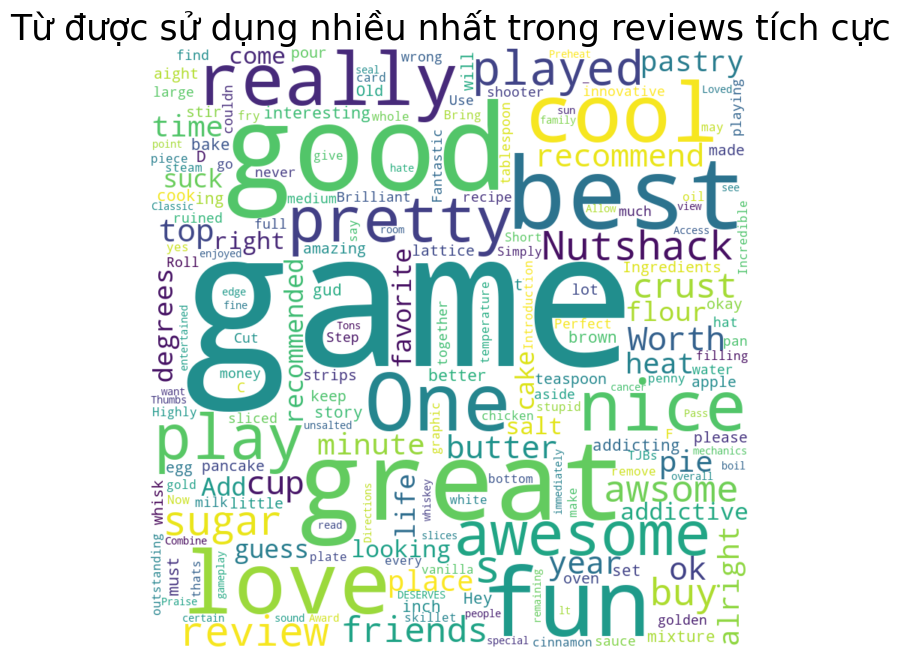

In [74]:
WordCloud_generator(df[df["review_score"]==1]["review_text"].astype(str), 
title="Từ được sử dụng nhiều nhất trong reviews tích cực")

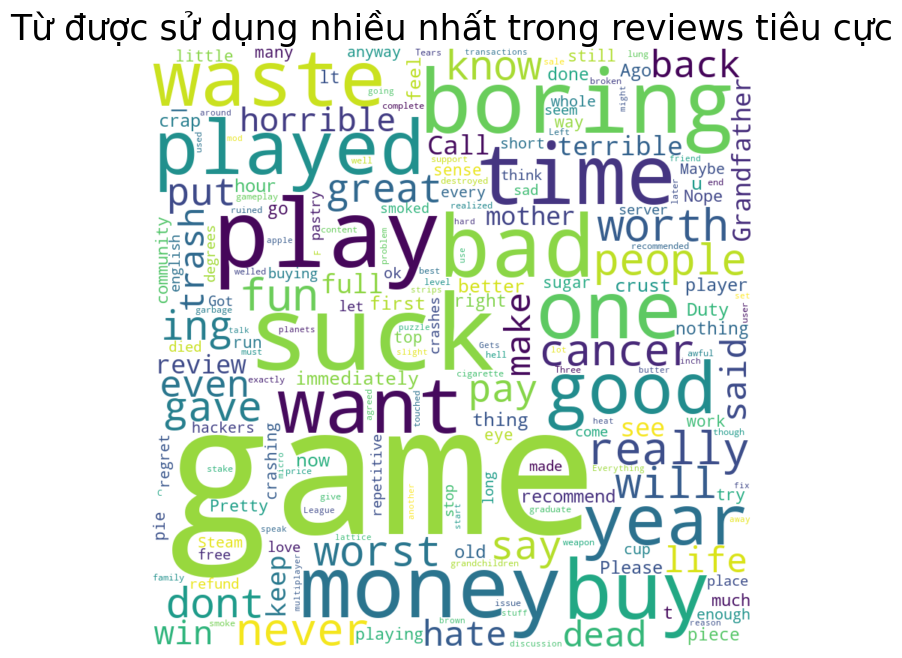

In [75]:
WordCloud_generator(df[df["review_score"]==-1]["review_text"].astype(str), 
title="Từ được sử dụng nhiều nhất trong reviews tiêu cực")

## Tiền xử lý dữ liệu (Preprocessing)

Phần xử lý chuỗi nằm ở trong module 'utils.py' và được import vào đây.

In [76]:
df = df.drop(['app_id', 'app_name'], axis=1)
df = df.dropna(subset=['review_text'])

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['review_score'] = labelencoder.fit_transform(df['review_score'])

In [78]:
np.random.seed(42)
sample_id = np.random.choice(df.index, 15000, replace=False)
data = df.copy() # Copy dataframe từ df qua data
# lấy 15000 dòng của 2 cột review_text và review_score
data = data.loc[sample_id, ['review_text', 'review_score']]
# Bỏ đi các dòng có Early Access Review
data = data[data['review_text'].str.contains('Early Access Review') == False]  

In [79]:
reviews_text = data['review_text'].reset_index(name='text') # Đặt lại index cho cột review_text
# Đếm tần suất xuất hiện của các từ lặp lại trong review_text sau khi tiền xử lý
tc = reviews_text['text'].value_counts().reset_index(name='count')
tc.rename(columns={'index': 'text'}, inplace=True)
tc.head(10) 

,text,count
0,great game,11
1,Great game,9
2,10/10,9
3,.,7
4,Nice game,7
5,Great game!,5
6,Great,5
7,♥♥♥♥,4
8,its good,4
9,It's alright.,4


### Chia tập dữ liệu thành 2 tập: train và test

In [80]:
from sklearn.model_selection import train_test_split
X = data.review_text # feature
y = data.review_score # label
# chia theo tỉ lệ 8/2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Chuyển dữ liệu về dạng số

In [81]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from utils import *

new_stopwords = stopwords.words('english')
# Trong các từ dừng, ta cần giữ lại các từ sau, vì có vai trò 
# ngữ nghĩa quan trọng trong câu.
new_stopwords.remove('no') 
new_stopwords.remove('not')

custom_stopwords = []

for w in new_stopwords:
    custom_stopwords.append(stem_tokenizer(preprocess_review(w))[0])

custom_vect = CountVectorizer(preprocessor=preprocess_review, 
                             tokenizer=stem_tokenizer,
                             stop_words=custom_stopwords,
                             max_features=8000)

X_train_vect = custom_vect.fit_transform(X_train)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  warnings.warn(


In [82]:
from collections import Counter # đếm số lượng các class
from imblearn.over_sampling import SMOTE # cân bằng dữ liệu
imbalanced = Counter(y_train)
print(f'Kích thước tập dữ liệu ban đầu')
print(f'0: {imbalanced[0]}, 1: {imbalanced[1]}')
sm = SMOTE(random_state=1142) # random_state để đảm bảo kết quả luôn như nhau
X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)
balanced = Counter(y_train_res)
print(f'Kích thước tập dữ liệu sau khi cân bằng')
print(f'0: {balanced[0]}, 1: {balanced[1]}')

Kích thước tập dữ liệu ban đầu
0: 1781, 1: 8347
Kích thước tập dữ liệu sau khi cân bằng
0: 8347, 1: 8347


## Mô hình học máy

### Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(C=10, penalty='l2') # C là trọng số chuẩn hóa, penalty là hàm chuẩn hóa
logres.fit(X_train_res, y_train_res)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

### Naive Bayes

In [84]:
from sklearn.naive_bayes import MultinomialNB
# Khong co lam min
nbWithoutSmoothing = MultinomialNB(alpha=0, force_alpha=True)
# Co lam min, vi gia tri default cua alpha la 1.0
nbWithSmoothing = MultinomialNB()
nbWithSmoothing.fit(X_train_res, y_train_res)
nbWithoutSmoothing.fit(X_train_res, y_train_res)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


MultinomialNB(alpha=0, force_alpha=True)

### Support Vector Machine

In [85]:
from sklearn.svm import SVC
svc1 = SVC(kernel='linear', C=10)
svc2 = SVC(kernel='rbf', C=10, gamma=0.1)
svc1.fit(X_train_res, y_train_res)
svc2.fit(X_train_res, y_train_res)

SVC(C=10, gamma=0.1)

### Decision Tree và Random Forest

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree1 = DecisionTreeClassifier(max_depth=100, max_features='auto', criterion='entropy',min_samples_leaf=1, min_samples_split=30)
tree2 = RandomForestClassifier(max_depth=10, n_estimators=100, max_features=1) 
tree1.fit(X_train_res, y_train_res)
tree2.fit(X_train_res, y_train_res)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


RandomForestClassifier(max_depth=10, max_features=1)

### Thuật toán boosting

#### XGBoost

In [87]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42) # objective: phan loai gi, random_state: đảm bảo kết quả luôn như nhau
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### CatBoost

In [88]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=100, learning_rate=0.01, depth=16, loss_function='Logloss')
cat.fit(X_train_res, y_train_res)

0:	learn: 0.6888231	total: 6.13s	remaining: 10m 6s
1:	learn: 0.6844937	total: 12.6s	remaining: 10m 16s
2:	learn: 0.6802126	total: 18.8s	remaining: 10m 6s
3:	learn: 0.6763177	total: 19.5s	remaining: 7m 48s
4:	learn: 0.6719872	total: 26.1s	remaining: 8m 15s
5:	learn: 0.6679837	total: 26.8s	remaining: 7m
6:	learn: 0.6640849	total: 33.3s	remaining: 7m 22s
7:	learn: 0.6600837	total: 39.7s	remaining: 7m 36s
8:	learn: 0.6562236	total: 45.8s	remaining: 7m 42s
9:	learn: 0.6526003	total: 51.9s	remaining: 7m 46s
10:	learn: 0.6489403	total: 58.2s	remaining: 7m 50s
11:	learn: 0.6452553	total: 1m 5s	remaining: 7m 57s
12:	learn: 0.6415662	total: 1m 11s	remaining: 8m
13:	learn: 0.6383000	total: 1m 18s	remaining: 8m 2s
14:	learn: 0.6349303	total: 1m 24s	remaining: 7m 59s
15:	learn: 0.6318092	total: 1m 30s	remaining: 7m 56s
16:	learn: 0.6287364	total: 1m 36s	remaining: 7m 52s
17:	learn: 0.6254742	total: 1m 38s	remaining: 7m 27s
18:	learn: 0.6224136	total: 1m 44s	remaining: 7m 25s
19:	learn: 0.6193129	to

## Học Sâu


### Xử lý dữ liệu cho mô hình học sâu

In [89]:
import torch
import torch.nn as nn
import torchtext.vocab as vocab
from torch.utils.data import DataLoader, Dataset

In [90]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
SEED = 42
torch.manual_seed(SEED)

In [91]:
np.random.seed(42)
sample_id = np.random.choice(df.index, 300000, replace=False) # lấy ngẫu nhiên 300000 dòng, replace=False để không lấy trùng
data = df.copy()
data = data.loc[sample_id, ['review_text', 'review_score']] # lấy 300000 dòng của 2 cột review_text và review_score
data = data[data['review_text'].str.contains('Early Access Review') == False] 

In [92]:
train_data, validate_data = train_test_split(data, test_size=0.2)
validate_data, test_data = train_test_split(validate_data, test_size=0.5)
train_data.shape, test_data.shape, validate_data.shape

((201878, 2), (25235, 2), (25235, 2))

In [93]:
tokens_count = Counter()
for line in data.review_text:
    tokens_count.update(tokenizer(preprocess_review(line)))
print(f'So luong cac token: {len(tokens_count)}')

So luong cac token: 180815


In [94]:
from torchtext.vocab import vocab

In [95]:
from collections import OrderedDict
sorted_by_freq_tuples = sorted(tokens_count.items(), 
                               key=lambda x: x[1], 
                               reverse=True)
ordered_dict = OrderedDict(sorted_by_freq_tuples)
vocab_review = vocab(ordered_dict) # 
# padding
vocab_review.insert_token('<pad>', 0)
# unknown
vocab_review.insert_token('<unk>', 1)
vocab_review.set_default_index(1)
print(f'Vocabulary size: {len(vocab_review)}')
print([vocab_review[token] for token in 
      ['my','whole','live','i','have','tried']])

Vocabulary size: 180817
[33, 295, 777, 8, 20, 480]


In [96]:
text_pipeline = lambda x: [vocab_review[token] for token in tokenizer(x)]
label_pipeline = lambda x: 1. if x == 1 else 0.  # we need float labels for BCEWithLogitsLoss

def collate_batch(batch):
    label_list, text_list, lengths = [], [], []
    for _label, _text in batch:
        if not isinstance(_text, str):
            continue
        processed_text = torch.tensor(text_pipeline(_text),
                                      dtype=torch.int64)
        if processed_text.size(0) > 0:
            label_list.append(label_pipeline(_label))
            text_list.append(processed_text)
            lengths.append(processed_text.size(0))
    label_list = torch.tensor(label_list)
    lengths = torch.tensor(lengths)
    padded_text_list = nn.utils.rnn.pad_sequence(
        text_list, batch_first=True)
    return padded_text_list, label_list, lengths

# check a small batch
tmp = DataLoader(list(zip(df.review_score, df.review_text)), batch_size=4, shuffle = False, collate_fn = collate_batch)
text_batch, label_batch, length_batch = next(iter(tmp))
print('text batch:', text_batch)
print('label batch:', label_batch)
print('length batch:', length_batch)
print('text batch shape:', text_batch.shape)

text batch: tensor([[   1,   33,  224,  ...,    0,    0,    0],
        [   1,   32,   26,  ...,  824,  129,    1],
        [   1,    7, 2149,  ...,    0,    0,    0],
        [   1,    1,   10,  ...,    0,    0,    0]])
label batch: tensor([1., 1., 1., 1.])
length batch: tensor([  4, 510,   6,  55])
text batch shape: torch.Size([4, 510])


In [97]:
batch_size = 32
train_dl = DataLoader(list(zip(train_data.review_score, train_data.review_text)), batch_size=batch_size,
                      shuffle=True, collate_fn=collate_batch) # 
valid_dl = DataLoader(list(zip(validate_data.review_score, validate_data.review_text)), batch_size=batch_size,
                      shuffle=False, collate_fn=collate_batch)
test_dl = DataLoader(list(zip(test_data.review_score, test_data.review_text)), batch_size=batch_size,
                      shuffle=False, collate_fn=collate_batch)

In [98]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size):
        super().__init__()
        # sentence embedding
        self.embedding = nn.Embedding(num_embeddings = vocab_size, 
                                      embedding_dim = embed_dim, 
                                      padding_idx = 0)
        # RNN layer
        # input dimensions are: (batch, seq, feature) 
        self.rnn = nn.RNN(input_size = embed_dim, 
                           hidden_size = rnn_hidden_size, 
                           batch_first = True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, text, lengths):
        out = self.embedding(text)
        # pad sententences with zero, lengths are the before padded
        out = nn.utils.rnn.pack_padded_sequence(out, 
                                                lengths.cpu().numpy(), 
                                                enforce_sorted = False, 
                                                batch_first = True)
        # output, hidden state
        # hidden state shape: D*num_layers, batch size, out_dim
        out, hidden = self.rnn(out)
        out = hidden[-1,:,:] # -1;:,: means last layer, all batches, all hidden units
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [99]:
torch.manual_seed(SEED)
vocab_size = len(vocab_review)
embed_dim = 10
rnn_hidden_size = 8
fc_hidden_size = 4
model_rnn = RNN(vocab_size, embed_dim, rnn_hidden_size, fc_hidden_size)
model_rnn

RNN(
  (embedding): Embedding(180817, 10, padding_idx=0)
  (rnn): RNN(10, 8, batch_first=True)
  (fc1): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [100]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_rnn.parameters(), lr=0.001)

In [101]:
def acc(pred, y):
    pred = torch.round(torch.sigmoid(pred))
    correct = (pred == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [102]:
def train(model ,dataloader):
    model.train()
    total_acc, total_loss = 0., 0.
    for batch_idx, (text_batch, label_batch, lengths) in enumerate(dataloader):
        text_batch = text_batch.to(device)
        label_batch = label_batch.to(device)
        pred = model(text_batch, lengths)[:, 0] # only get the last output
        loss = loss_fn(pred, label_batch.float()) # loss function
        optimizer.zero_grad() # clear gradients
        loss.backward() # backpropagation
        optimizer.step() # update weights
        total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
        total_loss += loss.item() * label_batch.size(0)
    return total_acc / len(dataloader.dataset), total_loss / len(dataloader.dataset)

def evaluate(model, dataloader):
    model.eval() 
    total_acc, total_loss = 0., 0.
    with torch.no_grad(): # No need to backpropagation
        for text_batch, label_batch, lengths in dataloader:
            text_batch = text_batch.to(device)
            label_batch = label_batch.to(device)
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch.float())
            total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)
    return total_acc / len(dataloader.dataset), total_loss / len(dataloader.dataset)

Trường hợp kernel bị crash khi training, hãy chạy dl.ipynb để train các model học sâu.

In [103]:
import os

if os.path.exists('model/rnn.pth'):
      model_rnn.load_state_dict(torch.load('model/rnn.pth'))
      print('Load model successfully')
else:
      num_epochs = 5
      torch.manual_seed(SEED)
      loss_hist_train = [0] * num_epochs
      accuracy_hist_train = [0] * num_epochs
      loss_hist_valid = [0] * num_epochs
      accuracy_hist_valid = [0] * num_epochs
      for epoch in range(num_epochs):
            model_rnn.to(device)
            acc_train, loss_train = train(model_rnn,train_dl)
            acc_valid, loss_valid = evaluate(model_rnn, valid_dl)
            print(f'Epoch {epoch} accuracy: {acc_train:.4f}'
                  f' val_accuracy: {acc_valid:.4f}')
            loss_hist_train[epoch] = loss_train
            accuracy_hist_train[epoch] = acc_train
            loss_hist_valid[epoch] = loss_valid
            accuracy_hist_valid[epoch] = acc_valid
      my_dpi = 100
      fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(540/my_dpi, 720/my_dpi), dpi=my_dpi)
      ax[0].plot(loss_hist_train, lw=2)
      ax[0].plot(loss_hist_valid, lw=2)
      ax[0].legend(['Train loss', 'Validation loss'], fontsize=12)
      ax[0].set_xlabel('Epochs', size=12)
      ax[1].plot(accuracy_hist_train, lw=2)
      ax[1].plot(accuracy_hist_valid, lw=2)
      ax[1].legend(['Train acc.', 'Validation acc.'], fontsize=12)
      ax[1].set_xlabel('Epochs', size=12);
      plt.tight_layout()
      plt.savefig(f'model_train_history_rnn.png', dpi = my_dpi);
      torch.save(model_rnn.state_dict(), 'model/lstm.pth')

Load model successfully


In [104]:
### Build a LSTM model
class LSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, lstm_hidden_size, fc_hidden_size):
        super().__init__()
        # sentence embedding
        self.embedding = nn.Embedding(num_embeddings = vocab_size, 
                                      embedding_dim = embed_dim, 
                                      padding_idx = 0)
        self.lstm = nn.LSTM(input_size = embed_dim, 
                           hidden_size = lstm_hidden_size, 
                           batch_first = True)
        self.fc1 = nn.Linear(rnn_hidden_size, fc_hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(fc_hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, text, lengths):
        out = self.embedding(text)
        # pad sententences with zero, lengths are the before padded
        out = nn.utils.rnn.pack_padded_sequence(out, 
                                                lengths.cpu().numpy(), 
                                                enforce_sorted = False, 
                                                batch_first = True)
        # output, hidden state
        # hidden state shape: D*num_layers, batch size, out_dim
        out, (hidden, cell) = self.lstm(out) 
        out = hidden[-1,:,:]
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

In [105]:
torch.manual_seed(SEED)
vocab_size = len(vocab_review)
embed_dim = 10
lstm_hidden_size = 8
fc_hidden_size = 4
model_lstm = LSTM(vocab_size, embed_dim, lstm_hidden_size, fc_hidden_size)
model_lstm

LSTM(
  (embedding): Embedding(180817, 10, padding_idx=0)
  (lstm): LSTM(10, 8, batch_first=True)
  (fc1): Linear(in_features=8, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [106]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr = 0.001)

In [107]:
if os.path.exists('model/lstm.pth'):
      model_lstm.load_state_dict(torch.load('model/lstm.pth'))
      print('Load model successfully')
else:
      num_epochs = 5
      torch.manual_seed(SEED)
      loss_hist_train = [0] * num_epochs
      accuracy_hist_train = [0] * num_epochs
      loss_hist_valid = [0] * num_epochs
      accuracy_hist_valid = [0] * num_epochs
      for epoch in range(num_epochs):
            model_lstm.to(device)
            acc_train, loss_train = train(model_lstm,train_dl)
            acc_valid, loss_valid = evaluate(model_lstm, valid_dl)
            print(f'Epoch {epoch} accuracy: {acc_train:.4f}'
                  f' val_accuracy: {acc_valid:.4f}')
            loss_hist_train[epoch] = loss_train
            accuracy_hist_train[epoch] = acc_train
            loss_hist_valid[epoch] = loss_valid
            accuracy_hist_valid[epoch] = acc_valid
      my_dpi = 100
      fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(540/my_dpi, 720/my_dpi), dpi=my_dpi)
      ax[0].plot(loss_hist_train, lw=2)
      ax[0].plot(loss_hist_valid, lw=2)
      ax[0].legend(['Train loss', 'Validation loss'], fontsize=12)
      ax[0].set_xlabel('Epochs', size=12)
      ax[1].plot(accuracy_hist_train, lw=2)
      ax[1].plot(accuracy_hist_valid, lw=2)
      ax[1].legend(['Train acc.', 'Validation acc.'], fontsize=12)
      ax[1].set_xlabel('Epochs', size=12);
      plt.tight_layout()
      plt.savefig(f'model_train_history_lstm.png', dpi = my_dpi);
      torch.save(model_lstm.state_dict(), 'model/lstm.pth')

Load model successfully


## Đánh giá hiệu suất mô hình

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Sklearn model, take in model, x_test, y_test
def evaluate_sklearn(model, x_test, y_test):
    x_test = custom_vect.fit_transform(x_test)
    y_pred = model.predict(x_test)
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    print(f'Specificity: {specificity:.4f}')
    print(f'F1: {f1_score(y_test, y_pred):.4f}')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.5266
Precision: 0.8291
Recall: 0.5432
Specificity: 0.4447
F1: 0.6563


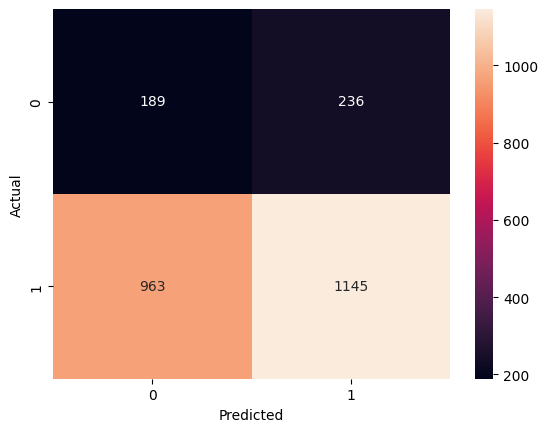

In [109]:
# Logistic Regression
evaluate_sklearn(logres, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.7418
Precision: 0.8308
Recall: 0.8662
Specificity: 0.1247
F1: 0.8481


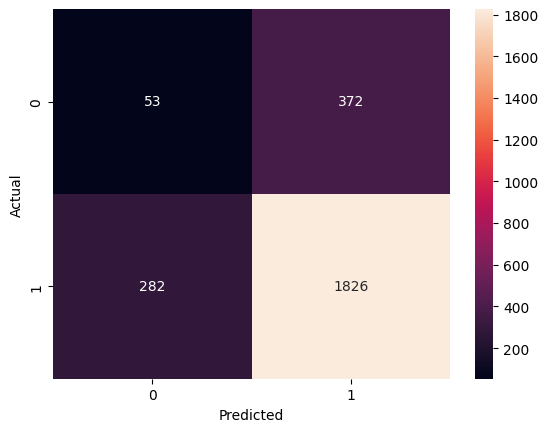

In [110]:
# Naive Bayes
evaluate_sklearn(nbWithSmoothing, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.6407
Precision: 0.8544
Recall: 0.6850
Specificity: 0.4212
F1: 0.7604


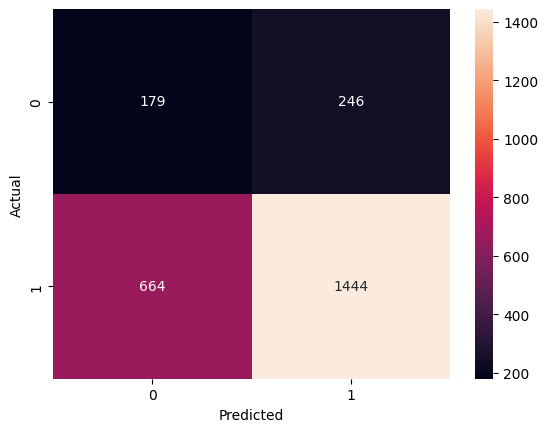

In [111]:
# Without smoothing
evaluate_sklearn(nbWithoutSmoothing, X_test, y_test) 

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.5393
Precision: 0.8325
Recall: 0.5588
Specificity: 0.4424
F1: 0.6687


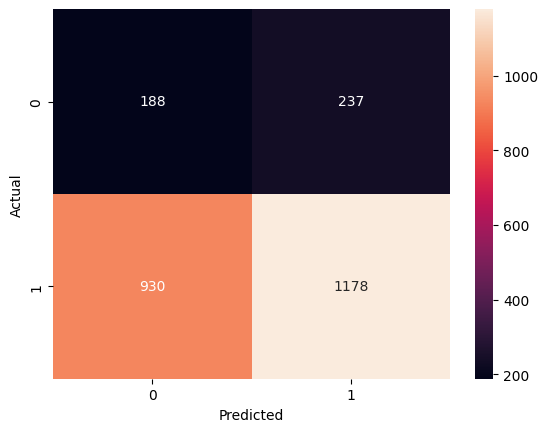

In [112]:
# SVM (Linear)
evaluate_sklearn(svc1, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.6060
Precision: 0.8157
Recall: 0.6803
Specificity: 0.2376
F1: 0.7419


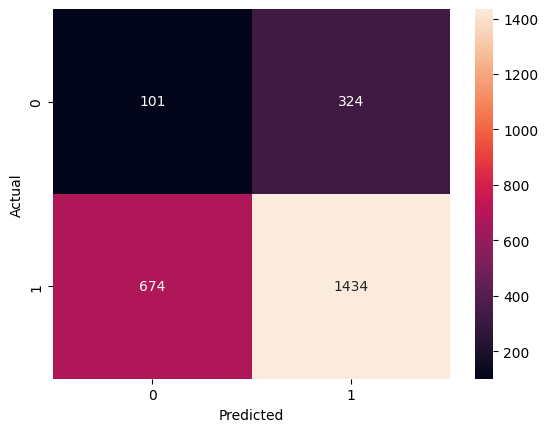

In [113]:
# SVM (RBF)
evaluate_sklearn(svc2, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.2373
Precision: 0.8385
Recall: 0.1034
Specificity: 0.9012
F1: 0.1841


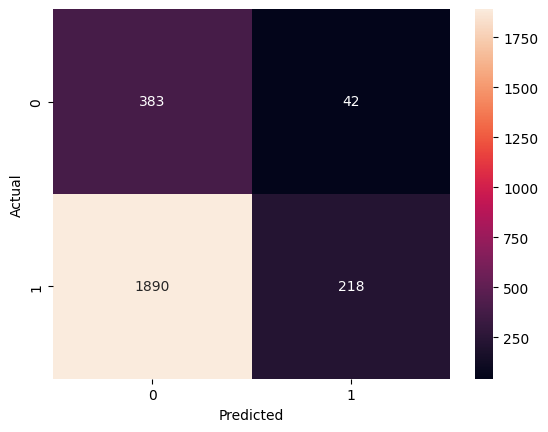

In [114]:
# Decision Tree
evaluate_sklearn(tree1, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.4982
Precision: 0.8098
Recall: 0.5190
Specificity: 0.3953
F1: 0.6326


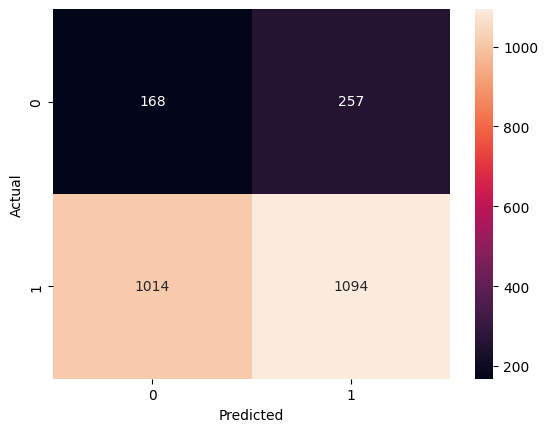

In [115]:
# Random Forest
evaluate_sklearn(tree2, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.8137
Precision: 0.8350
Recall: 0.9673
Specificity: 0.0518
F1: 0.8963


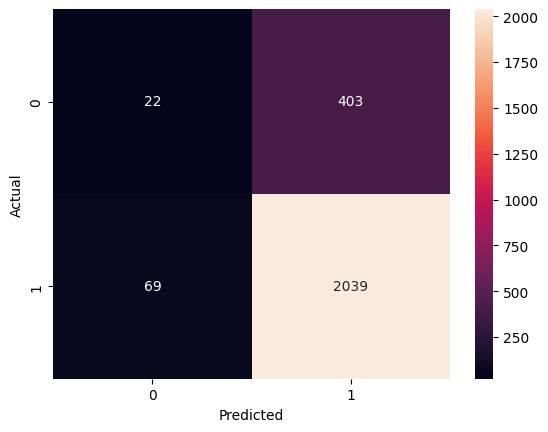

In [116]:
# XGBoost
evaluate_sklearn(xgb_model, X_test, y_test)

c:\Users\tatra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy: 0.1800
Precision: 0.8605
Recall: 0.0176
Specificity: 0.9859
F1: 0.0344


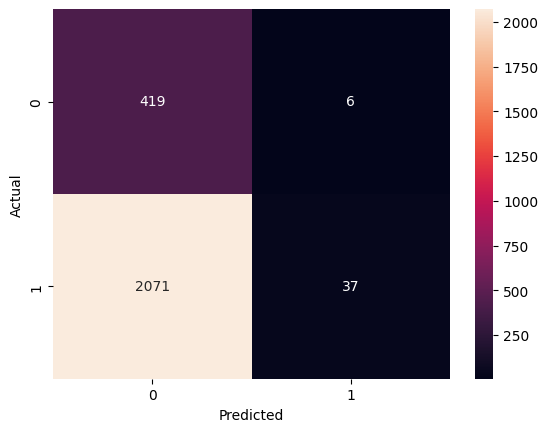

In [117]:
# CatBoost
evaluate_sklearn(cat, X_test, y_test)

In [118]:
# Evaluate deep learning model(s), return accuracy, precision, recall, f1 score, confusion matrix
def evaluate_dl(model, dataloader):
    model.to(device)
    model.eval()
    total_acc, total_loss = 0., 0.
    y_pred = []
    y_true = []
    with torch.no_grad():
        for text_batch, label_batch, lengths in dataloader:
            text_batch = text_batch.to(device)
            label_batch = label_batch.to(device)
            pred = model(text_batch, lengths)[:, 0]
            loss = loss_fn(pred, label_batch.float())
            total_acc += ((pred >= 0.5).float() == label_batch).float().sum().item()
            total_loss += loss.item() * label_batch.size(0)
            y_pred.extend((pred >= 0.5).float().cpu().numpy())
            y_true.extend(label_batch.cpu().numpy())
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)
    print(f'Specificity: {specificity:.4f}')
    print(f'F1: {f1_score(y_true, y_pred):.4f}')
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy: 0.8621
Precision: 0.9063
Recall: 0.9296
Specificity: 0.5363
F1: 0.9178


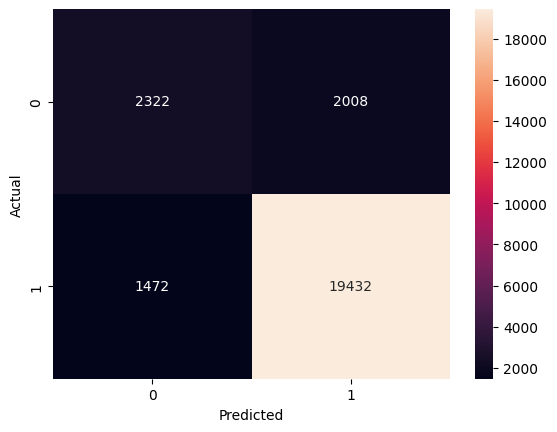

In [119]:
# RNN
evaluate_dl(model_rnn, test_dl)

Accuracy: 0.8855
Precision: 0.9293
Recall: 0.9327
Specificity: 0.6575
F1: 0.9310


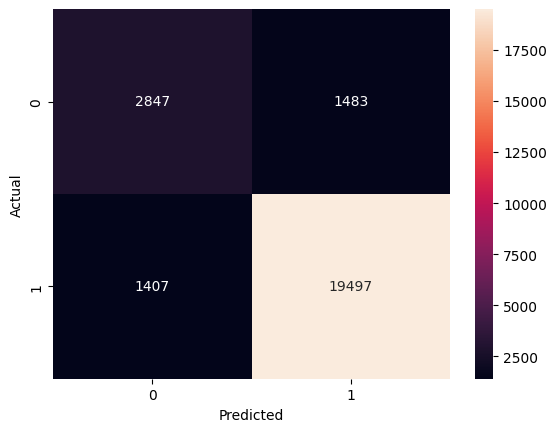

In [120]:
# LSTM
evaluate_dl(model_lstm, test_dl)

### Thử dự đoán mẫu 5 câu ngẫu nhiên bằng hai mô hình tốt nhất

In [127]:
import random

model_rnn.eval()

with torch.no_grad():
    for x_batch, y_batch, lengths in test_dl:
        break
        
x_batch = x_batch.to(device)
pred = model_rnn(x_batch, lengths)[:, 0]

# Randomly select 5 indices
random_indices = random.sample(range(len(x_batch)), k=5)

for i in random_indices:
    print('\nReview text:', ' '.join([vocab_review.get_itos()[j] for j in x_batch[i] if j != 0]))
    print('True label =', y_batch[i].item(),', model prediction', pred[i].item())


Review text: classic of classics
True label = 1.0 , model prediction 0.9853255152702332

Review text: <unk> a long wait for this game <unk> I have to admit that I love it just as much as I love <unk> <unk> <unk> 2 <unk> <unk> <unk> I <unk> only played <unk> hours so far and the game is only small at the moment but it <unk> beautiful and I <unk> loving driving around <unk> <unk> <unk> <unk> I would <unk> mind to get out of my truck and smack some of the <unk> drivers over the head for bashing my truck <unk> <unk> work from <unk> yet again <unk> ca <unk> wait to see what the future of <unk> holds <unk>
True label = 1.0 , model prediction 0.9783123731613159

Review text: <unk> game is giving me motion sickness purely by the way the screen moves when walking <unk> It also does <unk> work great with a touchpad <unk> ca <unk> drag the mouse and use buttons at the same time <unk> but I guess that <unk> more my fault for misplacing my usb mouse rather than the game <unk> fault <unk> <unk> <un

In [130]:
import random

model_lstm.eval()

with torch.no_grad():
    for x_batch, y_batch, lengths in test_dl:
        break
        
x_batch = x_batch.to(device)
pred = model_lstm(x_batch, lengths)[:, 0]

# Randomly select 5 indices
random_indices = random.sample(range(len(x_batch)), k=5)

for i in random_indices:
    print('\nReview text:', ' '.join([vocab_review.get_itos()[j] for j in x_batch[i] if j != 0]))
    print('True label =', y_batch[i].item(),', model prediction', pred[i].item())


Review text: <unk> better then you think
True label = 1.0 , model prediction 0.9243057370185852

Review text: <unk> has to be the <unk> remake of a classic <unk> game <unk> that I spent time from the <unk> <unk> even today on the <unk> <unk> playing <unk> <unk> <unk> than the great graphics <unk> there are new elements for battle and even leveling up <unk> <unk> <unk> if you do <unk> care for the new features <unk> you can turn them off <unk> <unk> only thing I would like added is the old title screen and <unk> as an extra to view and bring back some more nostliga <unk> <unk> I <unk> not complaining <unk> <unk> game types like <unk> <unk> is actually fun to play and helps develope skills <unk> <unk> any of you are a fan of the orginal <unk> <unk> then you really should play this game <unk> It <unk> so awesome <unk>
True label = 1.0 , model prediction 0.9944367408752441

Review text: <unk> <unk> <unk> <unk> <unk> I played it through with all the settings up on full <unk> using gtx <unk